# WordCloud

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
from PIL import Image
import numpy as np

## 1. Alice in Wonderland

In [6]:
from google.colab import files
uploaded = files.upload()
textfile = list(uploaded.keys())[0]

Saving Alice.txt to Alice.txt


In [8]:
uploaded = files.upload()
maskfile = list(uploaded.keys())[0]

Saving Alice_mask.png to Alice_mask.png


In [9]:
with open(textfile) as fp:
  text = fp.read()

In [12]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('said')

In [13]:
wc = WordCloud(background_color='white', max_words=1000, stopwords=stop_words)
wc.generate(text)

In [14]:
type(wc.words_)

dict

In [15]:
keys = list(wc.words_.keys())
values = list(wc.words_.values())
for i in range(10):
  print(keys[i], ':', values[i])

Alice : 1.0
little : 0.2958904109589041
one : 0.2602739726027397
know : 0.2465753424657534
like : 0.2356164383561644
would : 0.2273972602739726
went : 0.2273972602739726
thing : 0.2191780821917808
could : 0.21095890410958903
time : 0.21095890410958903


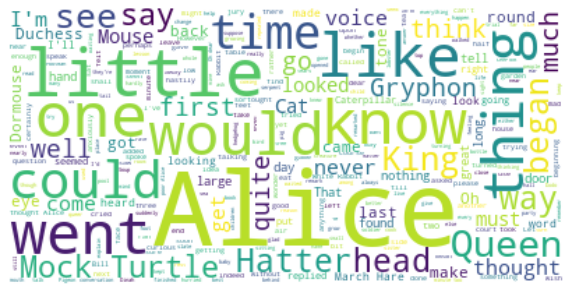

In [16]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

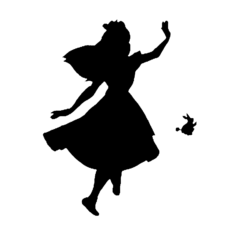

In [18]:
mask = np.array(Image.open(maskfile))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
wc = WordCloud(background_color='white', mask=mask, max_words=1000, stopwords=stop_words)
wc.generate(text)

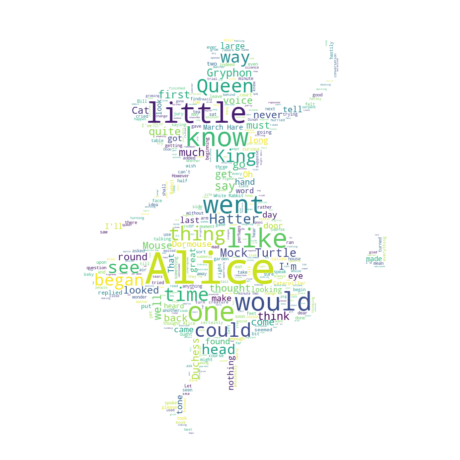

In [20]:
plt.figure(figsize=(8,9))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## 2. Star Wars

In [4]:
from google.colab import files
uploaded = files.upload()
textfile = list(uploaded.keys())[0]

Saving A_new_hope.txt to A_new_hope.txt


In [5]:
uploaded = files.upload()
textfile = list(uploaded.keys())[0]

Saving Stormtrooper_mask.png to Stormtrooper_mask.png


In [6]:
with open(textfile) as fp:
    text = fp.read()
text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

UnicodeDecodeError: ignored

In [47]:
from wordcloud import STOPWORDS
stop_words = set(STOPWORDS)
stop_words.add('int')
stop_words.add('ext')
len(stop_words)

192

In [48]:
mask = np.array(Image.open(maskfile))
wc = WordCloud(mask=mask, max_words=1000, stopwords=stop_words, margin=10, random_state=2021)
wc.generate(text)
default_colors = wc.to_array

In [49]:
import random
def grey_color(word, font_size, position,
               orientation, random_state=None, **kwargs):
    # return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)     
    # hue, saturation, lightness
    return f'hsl(0, 0%, {random.randint(60,100)}%)'

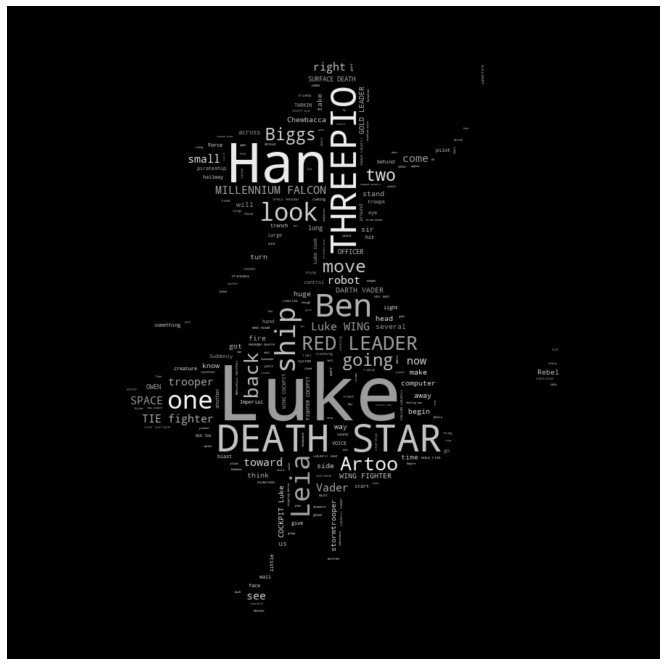

In [50]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color, random_state=2021), interpolation='bilinear')
plt.axis('off')
plt.show()